In [295]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [296]:
#Loading the data
data = pd.read_csv('training.csv')
data.head(5)

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded,profit,id
0,34.0,admin.,single,university.degree,no,no,yes,cellular,apr,wed,...,-1.8,93.075,-47.1,1.498,5099.1,999.0,0,no,NaN,1
1,31.0,services,single,high.school,no,no,no,cellular,jul,thu,...,1.4,93.918,-42.7,4.968,5228.1,999.0,0,no,NaN,2
2,NaN,admin.,single,high.school,no,no,no,telephone,jun,NaN,...,1.4,94.465,-41.8,4.961,5228.1,999.0,0,no,NaN,3
3,52.0,admin.,divorced,university.degree,unknown,yes,no,cellular,jul,tue,...,1.4,93.918,-42.7,4.962,5228.1,999.0,0,no,NaN,4
4,39.0,blue-collar,single,NaN,unknown,yes,no,cellular,jul,tue,...,1.4,93.918,-42.7,4.961,5228.1,999.0,0,no,NaN,5


# Basic Info

In [297]:
#Columns & dataypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8238 entries, 0 to 8237
Data columns (total 24 columns):
custAge           6224 non-null float64
profession        8238 non-null object
marital           8238 non-null object
schooling         5832 non-null object
default           8238 non-null object
housing           8238 non-null object
loan              8238 non-null object
contact           8238 non-null object
month             8238 non-null object
day_of_week       7451 non-null object
campaign          8238 non-null int64
pdays             8238 non-null int64
previous          8238 non-null int64
poutcome          8238 non-null object
emp.var.rate      8238 non-null float64
cons.price.idx    8238 non-null float64
cons.conf.idx     8238 non-null float64
euribor3m         8238 non-null float64
nr.employed       8238 non-null float64
pmonths           8238 non-null float64
pastEmail         8238 non-null int64
responded         8238 non-null object
profit            928 non-null f

# Checking No. of Unknown values in Categorical Features

In [298]:
i=0
for c in data.columns:
    if data[c].dtypes==object:
        print(data[c].value_counts())
        print(50*'-')
    i+=1

admin.           2102
blue-collar      1847
technician       1351
services          792
management        583
retired           337
entrepreneur      314
self-employed     279
housemaid         213
unemployed        190
student           159
unknown            71
Name: profession, dtype: int64
--------------------------------------------------
married     4957
single      2339
divorced     932
unknown       10
Name: marital, dtype: int64
--------------------------------------------------
university.degree      1731
high.school            1340
basic.9y                863
professional.course     738
basic.4y                586
basic.6y                313
unknown                 260
illiterate                1
Name: schooling, dtype: int64
--------------------------------------------------
no         6619
unknown    1618
yes           1
Name: default, dtype: int64
--------------------------------------------------
yes        4300
no         3754
unknown     184
Name: housing, dtype: int64

It is observed that number of unknowns is high in some features such as 'Default'. However, the 'unknown' fields are not imputed because 'unknown' fields themselves could be a source of information. The missing fields in 'Day of week' and 'Schooling' features are also filled with 'unknown' values.

In [299]:
#Filling missing values in 'Day of week' & 'Schooling' features with 'unknown'
data['day_of_week'].fillna('unknown',inplace=True)
data['schooling'].fillna('unknown',inplace=True)

# Nature of Dataset

no     7310
yes     928
Name: responded, dtype: int64


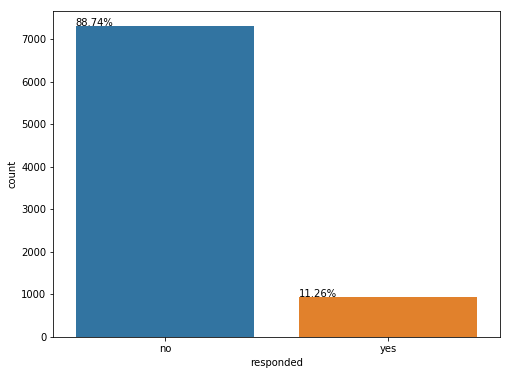

In [300]:
print(data['responded'].value_counts())
plt.figure(figsize=(8,6))
size = len(data['responded'])
pl=sns.countplot(x="responded", data=data)
for r in pl.patches:
    pl.annotate('{:.2f}%'.format(100*r.get_height()/size), xy=(r.get_x(), r.get_height()))
    
plt.show()

The dataset is an imbalanced dataset. Negative class (88.74%) dominates the Positive class (11.26%)
1. 'Balanced' class weights can be used in Logistic Regression model
2. Techniques such as Upsampling can be tried
3. Performace metrics such as accuracy cannot be relied upon. Metrics csuch as AUC score, F1 score can be used.

# EDA

# Categorical Features

In [301]:
# Function for Univariate EDA of Categorical Features
def countplot(X,df, xlabel):
    total=len(data['responded'])
    size=list(X.value_counts())
    l=len(size)
    plt.figure(figsize=(14,6))
    pl=sns.countplot(x=X, data=df, hue='responded', order=X.value_counts().index)
    i=0
    for r in pl.patches:
        pl.annotate('{:.0f}%'.format(100*r.get_height()/size[int(i%l)]), xy=(r.get_x(), r.get_height()))
        i+=1
    pl.set_xlabel(xlabel,fontsize=15)
    pl.set_ylabel("No. of Customers", fontsize=15)
    pl.tick_params(labelsize=10, rotation =20)
    plt.show()

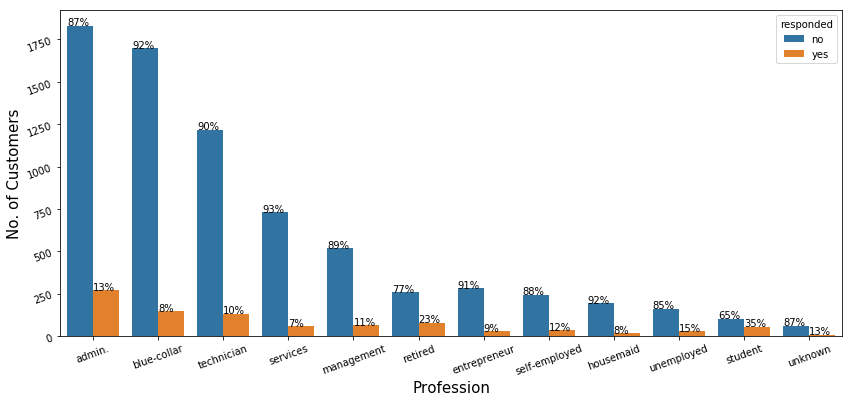

In [302]:
countplot(data['profession'],data, 'Profession')

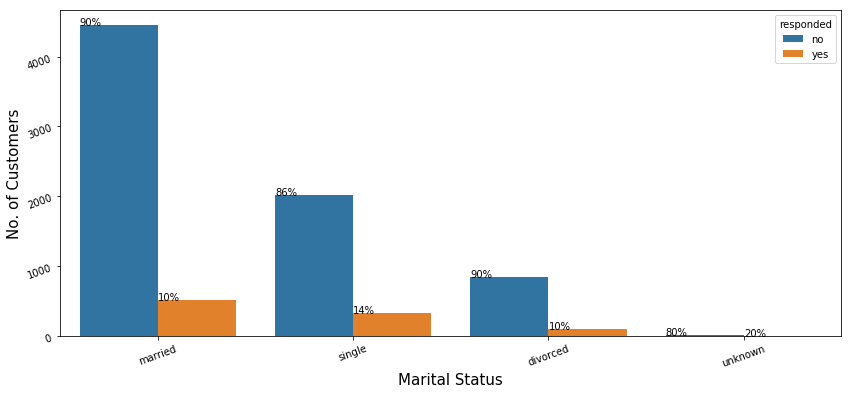

In [303]:
countplot(data['marital'],data, 'Marital Status')

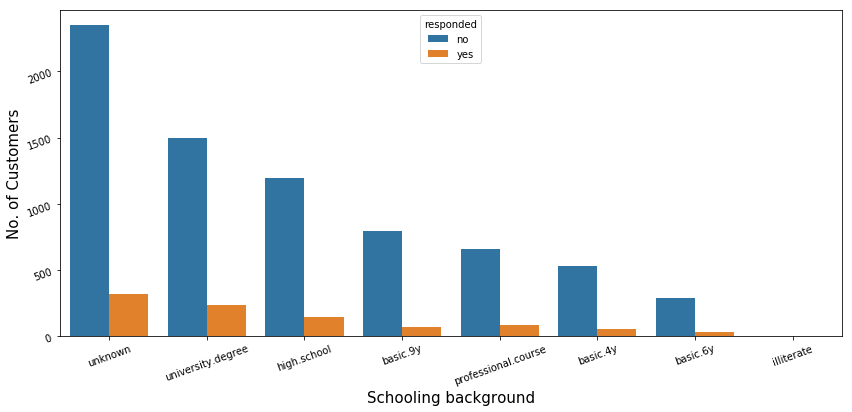

In [220]:
countplot(data['schooling'],data, 'Schooling background')

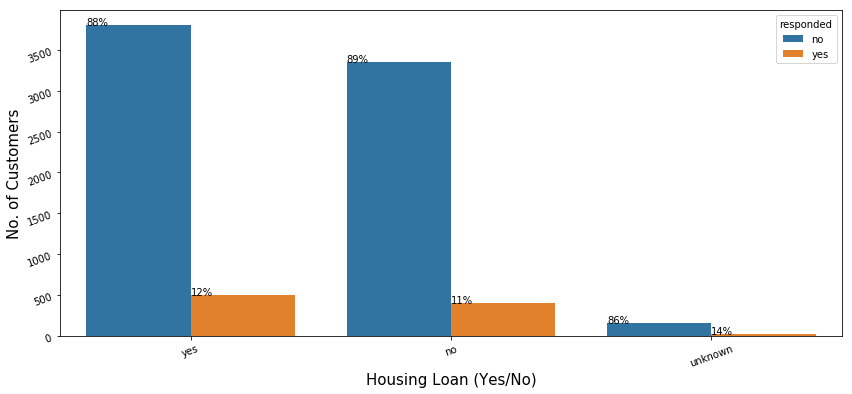

In [304]:
countplot(data['housing'],data, 'Housing Loan (Yes/No)')

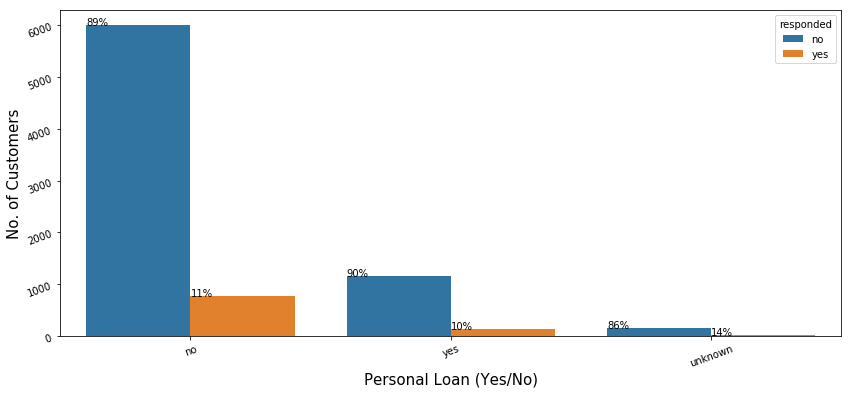

In [305]:
countplot(data['loan'],data, 'Personal Loan (Yes/No)')

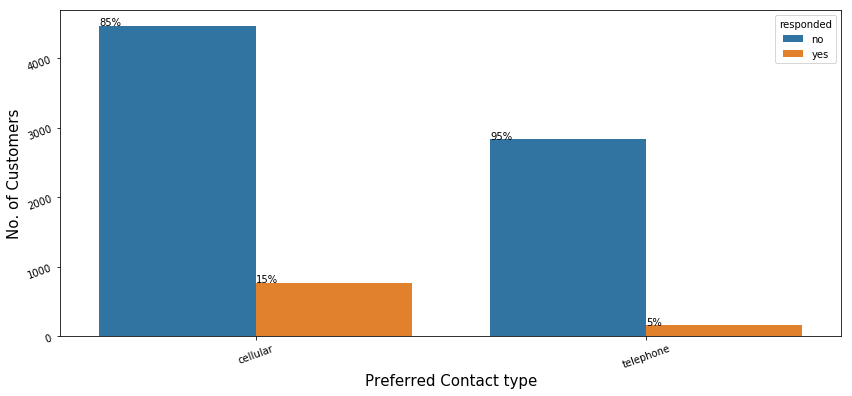

In [306]:
countplot(data['contact'],data, 'Preferred Contact type')

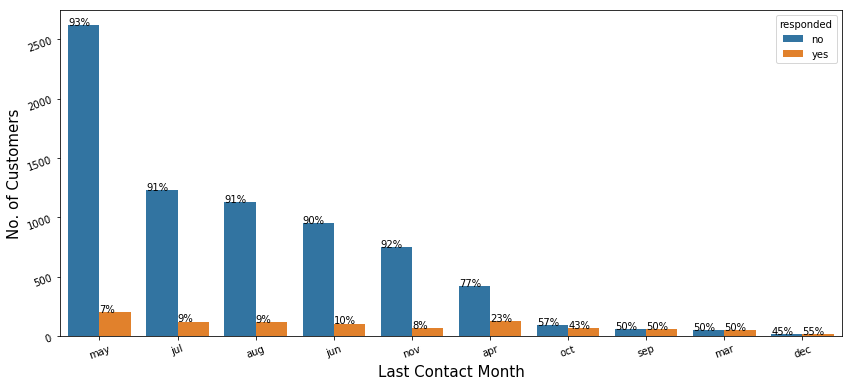

In [307]:
countplot(data['month'],data, 'Last Contact Month')

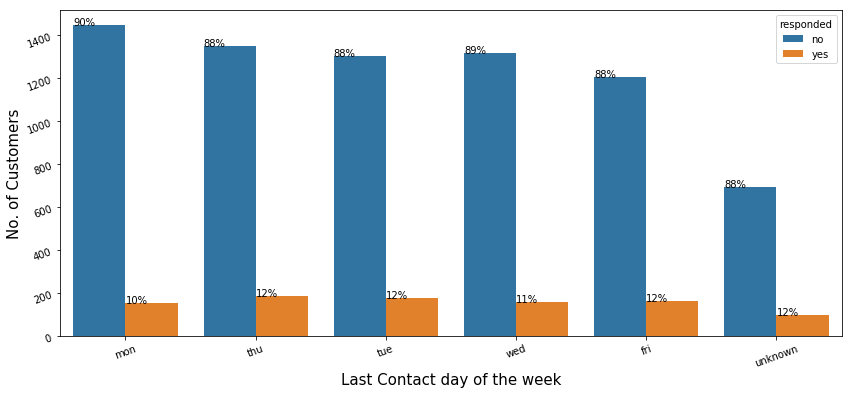

In [308]:
countplot(data['day_of_week'],data, 'Last Contact day of the week' )

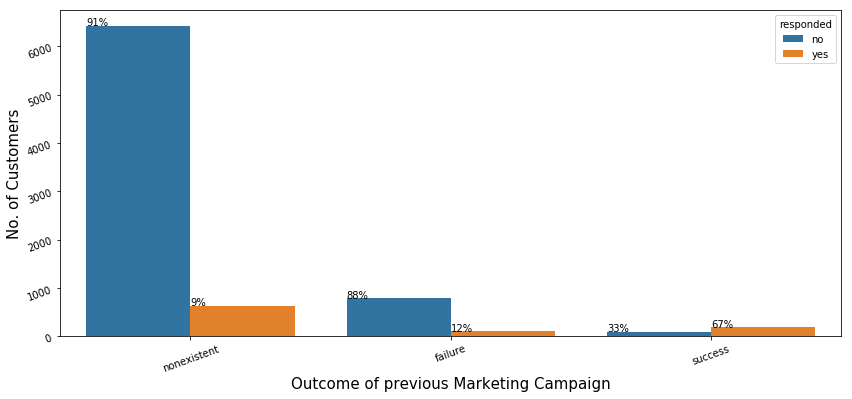

In [309]:
countplot(data['poutcome'],data, 'Outcome of previous Marketing Campaign')

# Numerical Features

In [310]:
#Numerical Features Stats
data.describe()

,custAge,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,profit,id
count,6224.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,8238.000000,928.000000,8238.000000
mean,39.953728,2.531682,960.916606,0.183054,0.056397,93.570977,-40.577907,3.586929,5165.575965,960.687436,0.365501,172.112069,4119.500000
std,10.540516,2.709773,190.695054,0.514209,1.566550,0.578782,4.650101,1.742784,72.727423,191.841012,1.294101,128.999186,2378.250092
min,18.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000,0.000000,-276.000000,1.000000
25%,32.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000,999.000000,0.000000,124.000000,2060.250000
50%,38.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.857000,5191.000000,999.000000,0.000000,170.000000,4119.500000
75%,47.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,999.000000,0.000000,213.250000,6178.750000
max,94.000000,40.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,999.000000,25.000000,515.000000,8238.000000


In [311]:
#Function to plot Numerical Features distributions
def Numplot(x, label):
    x1 = data[data['responded']=='yes'][x].values
    x2 = data[data['responded']=='no'][x].values

    #PDF Distribution
    plt.figure(figsize=(4,3))
    sns.distplot(x1 , hist=False, label="YES")
    sns.distplot(x2 , hist=False, label="NO")
    plt.title(label)
    plt.xlabel(label)
    plt.legend()
    plt.show()

    #Box Plot
    plt.figure(figsize=(4,3))
    plt.boxplot([x1, x2])
    plt.title('Boxplot')
    plt.xticks([1,2],('YES','NO'))
    plt.ylabel(label)
    plt.grid()
    plt.show()

Customer Age:

In [312]:
print('Mean Age:', data['custAge'].mean())
print('Age Median:', data['custAge'].median())

Mean Age: 39.95372750642674
Age Median: 38.0


In [313]:
#Filling NaN values of Customer Age Feature
#Missing Age values are filled with mean age of customers with same marital status
df_cust_age = pd.DataFrame(data.groupby('marital')['custAge'].agg(np.mean).round())

z = data['custAge'].isnull()
for row in data.index:
    if z[row]:
        k = data['marital'].loc[row]
        data.set_value(index=row, col='custAge', value=df_cust_age['custAge'].loc[k])

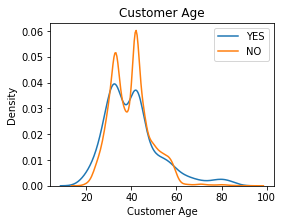

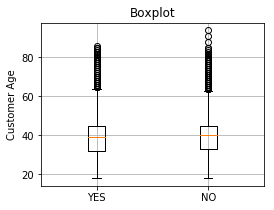

In [314]:
Numplot('custAge', 'Customer Age')

-





Campaign: Number of time Customer was contacted:

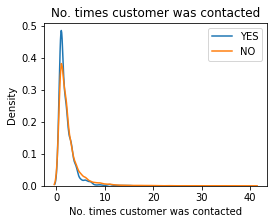

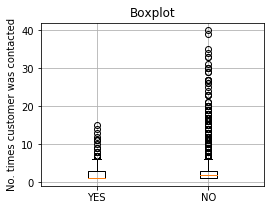

In [315]:
Numplot('campaign', 'No. times customer was contacted')

-

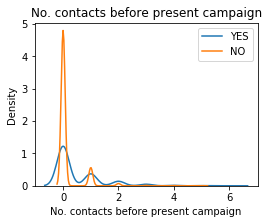

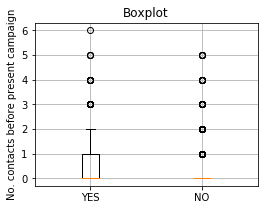

In [316]:
Numplot('previous', 'No. contacts before present campaign')

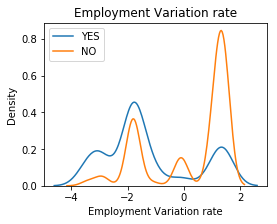

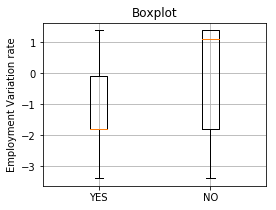

In [317]:
Numplot('emp.var.rate', 'Employment Variation rate')

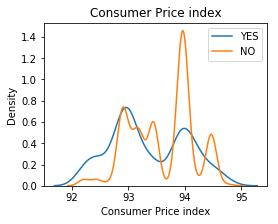

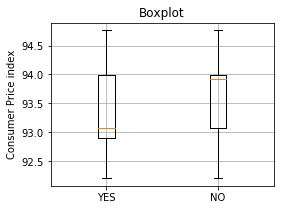

In [318]:
Numplot('cons.price.idx', 'Consumer Price index')

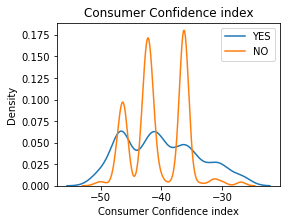

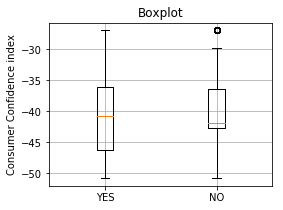

In [319]:
Numplot('cons.conf.idx', 'Consumer Confidence index')

Numplot('euribor3m', 'Euribor 3 Month rate')

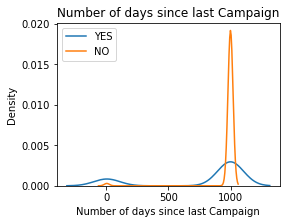

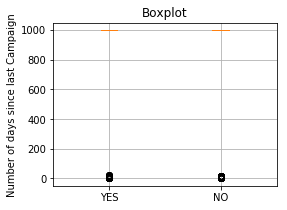

In [320]:
Numplot('pdays', 'Number of days since last Campaign')

# Data Pre-Processing

In [321]:
#Because of the above distribution with large number of outliers in boxplot pdays feature is binned
data['pdays'].value_counts()

999    7922
6        90
3        86
4        25
9        17
7        16
2        13
12       12
10        8
5         7
13        6
14        6
15        5
11        5
16        4
1         4
8         3
0         3
17        2
25        1
21        1
22        1
19        1
Name: pdays, dtype: int64

In [322]:
bins=np.arange(-1,26,5)
bins=np.append(bins, 1000)

data['pdays_binned']=pd.cut(x=data['pdays'], bins=bins)
data['pdays_binned']=data['pdays_binned'].astype(str)

data['pdays_binned'].value_counts()

(24, 1000]    7923
(4, 9]         133
(-1, 4]        131
(9, 14]         37
(14, 19]        12
(19, 24]         2
Name: pdays_binned, dtype: int64

In [323]:
# Dropping pdays, pmonths features (similar to pdays)
data = data.drop(['pdays', 'pmonths', 'id'], axis=1)

# Numerical Features Preprocessing

In [324]:
#Function for Standardization ofNumerical Features
numerical_features = (data.columns[data.dtypes!=object])
numerical_features = numerical_features.drop('profit')

#Standardization function
def stan(x_tr_values, x_te_values, x_train, x_test):
    scaler = StandardScaler()
    scaler.fit(x_tr_values)

    x_train[num] = scaler.transform(x_tr_values)
    x_test[num] = scaler.transform(x_te_values)

# Categorical Features - Basic Preprocessing

In [325]:
categorical_features = (data.columns[data.dtypes==object])

for col in categorical_features:
    data[col] = data[col].str.lower()
    data[col] = data[col].str.replace('.','')
    data[col] = data[col].str.replace('-','_')

In [326]:
#One Hot Encoding function to convert Categorical features into vectors
def ohe(cat, x_tr):
    vectorizer = CountVectorizer()
    vectorizer.fit(x_tr[cat])
    
    x_tr_encoded_cols = vectorizer.transform(x_tr[cat])
    i=0
    for col in vectorizer.get_feature_names():
        name=cat+'_'+col
        x_tr[name] = x_tr_encoded_cols[:,i].toarray().ravel().tolist()
        i+=1
    return (x_tr)

In [327]:
#Categorical features:
categorical_features = (data.columns[data.dtypes==object])
categorical_features = categorical_features.drop('responded')

#One hot Encoding of Categorical features:
for cat_fea in categorical_features:
    data= ohe(cat_fea, data)

In [328]:
#Dropping Original Categorical features
data = data.drop(categorical_features, axis=1)

In [329]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8238 entries, 0 to 8237
Data columns (total 70 columns):
custAge                         8238 non-null float64
campaign                        8238 non-null int64
previous                        8238 non-null int64
emp.var.rate                    8238 non-null float64
cons.price.idx                  8238 non-null float64
cons.conf.idx                   8238 non-null float64
euribor3m                       8238 non-null float64
nr.employed                     8238 non-null float64
pastEmail                       8238 non-null int64
responded                       8238 non-null object
profit                          928 non-null float64
profession_admin                8238 non-null int64
profession_blue_collar          8238 non-null int64
profession_entrepreneur         8238 non-null int64
profession_housemaid            8238 non-null int64
profession_management           8238 non-null int64
profession_retired              8238 non-null i

In [330]:
#Pre-processed data into csv format
data.to_csv('data_preprocessed_1.csv', index=False)

# Modelling

# Various functions

# Finding treshold corresponding to Max Total Profit and Converting Probabilities into Predictions at specific threshold

In [331]:
def best_threshold_value(thresholds, x_test, y_test, y_test_pred):
    profit_dict = {} 
    lst_t=[]
    lst_profit=[]
    for t in thresholds:
        y_class_list = prediction(y_test_pred, t)
        y_test_class = np.array(y_class_list).reshape(len(y_class_list),1)
        z=confusion_matrix(y_test, y_test_class)
        x_test_true = np.take(x_test, np.where(y_test==1)[0], 0)
        y_test_lirg = ri_regr.predict(x_test_true)
        avg_profit = y_test_lirg.mean()
        total_profit=(avg_profit*(z[1][1]))-(30*(z[1][1]+z[0][1]))
        profit_dict[t] = total_profit
        lst_t.append(t)
        lst_profit.append(profit_dict[t])
    
    best_t = max(profit_dict, key=profit_dict.get) 
    max_total_profit = profit_dict[best_t]
    
    print("best threshold:", best_t)
    print(50*"-")
    
    plt.figure(figsize=(10,6))
    plt.plot(lst_t,lst_profit)
    plt.xlabel('Thresholds', fontsize=15)
    plt.ylabel('Total Profit', fontsize=15)
    plt.title('Total Profit vs Thresholds', fontsize=15)
    return best_t, max_total_profit

#Function to Convert y_probabilities into y_predictions (i.e. 1 or 0) at specific threshold
def prediction(proba, threshold):
    predictions = []
    for i in proba:
        if i>=threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

# Linear (Ridge) Regression:

In [332]:
def regression(x_train, y_train):
    ri_reg = Ridge()
    parameters = {'alpha':[0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]}
    reg = GridSearchCV(ri_reg, parameters, cv=5, scoring='r2')
    reg.fit(x_train, y_train)

    results = pd.DataFrame.from_dict(reg.cv_results_)
    results = results.sort_values(['param_alpha'])

    train_r2= results['mean_train_score']
    cv_r2 = results['mean_test_score'] 
    alpha =  results['param_alpha']

    best_alpha = alpha[np.argmax(cv_r2)]
    cv_test_r2 = max(cv_r2)
    
    ri_regr = Ridge(alpha=best_alpha)
    ri_regr.fit(x_train, y_train)
    
    return(ri_regr)

# Performance Metrics

In [333]:
def perf_metric(metric, y_test, y_test_pred, metric_name):
    score=metric(y_test, y_test_pred)
    print('Test', metric_name, ': ')
    print(score)
    print(50*"-")
    return(score)

# Modeling - Logistic Regression, Predictions, Maximum total Profit

# Finding best threshold & Maximum total Profit

Logistic Regression
Best hyperparameter - C is:  0.75 ;  Test logistic Regression AUC is:  0.7911360914956849
Logistic Regression Test AUC score:  0.8039806076742981
--------------------------------------------------
best threshold: 0.6535323511400637
--------------------------------------------------
Test Confusion Matrix : 
[[1953  241]
 [ 106  172]]
--------------------------------------------------
Test Precision Score : 
0.41646489104116224
--------------------------------------------------
Test Recall Score : 
0.6187050359712231
--------------------------------------------------
Test F1 Score : 
0.4978292329956585
--------------------------------------------------
Max Profit:  19684.465993640242


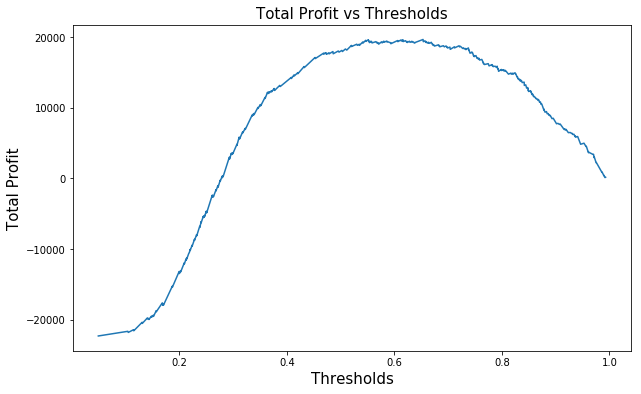

In [337]:
# Finding best threshold & Maximum total Profit

Data = pd.read_csv('data_preprocessed_1.csv')

y = Data['responded']
x = Data

#Splitting the data set into train and test datasets; Test dataset = 30%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=2020)

#Contrverting labels from yes, no to 1, 0
y_train.replace({"no":0, "yes":1}, inplace=True)
y_test.replace({"no":0, "yes":1}, inplace=True)
    
#Standardization of Numerical features:
for num in numerical_features:
    stan(x_train[num].values.reshape(-1,1), x_test[num].values.reshape(-1,1), x_train, x_test)

#Dataset for the Linear Regression part of the problem (for Profit Calculation)
#Dataset for the Linear Regression part will be only the Positive class, i.e. those who have responded (yes) to campaign
data_train_lirg = x_train[x_train['responded']=='yes']
data_test_lirg = x_test[x_test['responded']=='yes']

y_train_lirg = data_train_lirg['profit']
y_test_lirg = data_test_lirg['profit']
x_train_lirg = data_train_lirg.drop(['profit', 'responded'], axis=1)
x_test_lirg = data_test_lirg.drop(['profit', 'responded'], axis=1)

#Dropping the 'responded' & 'profit' columns from x_train & x_test after preparation of dataset for Linerar Regression
x_train = x_train.drop(['responded', 'profit'], axis=1)
x_test = x_test.drop(['responded', 'profit'], axis=1)

#Logistic Regression:
#k-fold Cross validation - Hyperparameter tuning

lr = LogisticRegression(penalty='l2', class_weight='balanced')
parameters = {'C':[0.001, 0.0025, 0.005, 0.0075, 0.01, 0.025, 0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]}
clf = GridSearchCV(lr, parameters, cv=5, scoring='roc_auc')
clf.fit(x_train, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_C'])

train_auc= results['mean_train_score']
cv_auc = results['mean_test_score'] 
C =  results['param_C']

best_C = C[np.argmax(cv_auc)]
cv_testset_aucscore = max(cv_auc)
print('Logistic Regression')
print("Best hyperparameter - C is: ", best_C, "; ", "Test logistic Regression AUC is: ", cv_testset_aucscore)
    
#Classification of x_test with best hyperparameter
lr = LogisticRegression(penalty='l2', C=best_C, class_weight='balanced')
lr.fit(x_train, y_train)

y_train_proba = lr.predict_proba(x_train)[:,1]
y_test_proba = lr.predict_proba(x_test)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_proba)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_proba)

testset_auc=auc(test_fpr, test_tpr)
print("Logistic Regression Test AUC score: ", testset_auc)
print(50*"-")
    
#Linear Regression to find the Average Profit per customer:
ri_regr = regression(x_train_lirg, y_train_lirg)
    
#Finding the best threshold which maximizes the Total Profit
#Inputs to the function: Thresholds, x_test, y_actual, y_predictions (probabilities),
best_t, max_total_profit = best_threshold_value(te_thresholds, x_test, y_test, y_test_proba)

#Predictions: Converts Probabilities to Predictions using the best threshold
y_test_pred = prediction(y_test_proba, best_t)

#Performance metrics
conf_matrix = perf_metric(confusion_matrix, y_test, y_test_pred, 'Confusion Matrix')
precision = perf_metric(precision_score, y_test, y_test_pred, 'Precision Score')
recall = perf_metric(recall_score, y_test, y_test_pred, 'Recall Score')
F1_score = perf_metric(f1_score, y_test, y_test_pred, 'F1 Score')
    
print("Max Profit: ", max_total_profit)


# Predictions on Testing data

In [338]:
#Loading the Testing data
testing_data = pd.read_csv('testingCandidate.csv')
testing_data.info()
testing_data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 22 columns):
custAge           24908 non-null float64
profession        32950 non-null object
marital           32950 non-null object
schooling         23180 non-null object
default           32950 non-null object
housing           32950 non-null object
loan              32950 non-null object
contact           32950 non-null object
month             32950 non-null object
day_of_week       29622 non-null object
campaign          32950 non-null int64
pdays             32950 non-null int64
previous          32950 non-null int64
poutcome          32950 non-null object
emp.var.rate      32950 non-null float64
cons.price.idx    32950 non-null float64
cons.conf.idx     32950 non-null float64
euribor3m         32950 non-null float64
nr.employed       32950 non-null float64
pmonths           32950 non-null float64
pastEmail         32950 non-null int64
id                32950 non-null int64
dtypes: f

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,id
0,NaN,admin.,married,NaN,no,no,yes,cellular,sep,wed,...,1,failure,-1.1,94.199,-37.5,0.886,4963.6,999.0,2,1
1,35.0,services,married,high.school,no,no,no,cellular,sep,tue,...,1,success,-3.4,92.379,-29.8,0.788,5017.5,0.1,2,2
2,50.0,blue-collar,married,professional.course,unknown,yes,no,cellular,may,thu,...,1,failure,-1.8,92.893,-46.2,1.327,5099.1,999.0,2,3
3,30.0,admin.,single,university.degree,no,no,no,cellular,aug,wed,...,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,999.0,0,4
4,39.0,services,divorced,high.school,no,yes,no,cellular,nov,tue,...,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,999.0,0,5


Filling missing values:

In [339]:
#Filling missing values in 'Day of week' & 'Schooling' features with 'unknown'
testing_data['day_of_week'].fillna('unknown',inplace=True)
testing_data['schooling'].fillna('unknown',inplace=True)

In [340]:
z=testing_data['custAge'].isnull()
for row in testing_data.index:
    if z[row]:
        k = testing_data['marital'].loc[row]
        testing_data.set_value(index=row, col='custAge', value=df_cust_age['custAge'].loc[k])

In [341]:
#Binning pdays feature & Dropping originalpdays & pmonths features
bins=np.arange(-1,26,5)
bins=np.append(bins, 1000)

testing_data['pdays_binned'] = pd.cut(x=testing_data['pdays'], bins=bins)
testing_data['pdays_binned'] = testing_data['pdays_binned'].astype(str)

testing_data['pdays_binned'].value_counts()
testing_data = testing_data.drop(['pdays', 'pmonths', 'id'],axis=1)

In [342]:
#Standardization of Numerical features:
for num in numerical_features:
    scaler = StandardScaler()
    scaler.fit(data[num].values.reshape(-1,1))
    
    testing_data[num] = scaler.transform(testing_data[num].values.reshape(-1,1))
    
#One hot Encoding of Categorical features:
categorical_features = (testing_data.columns[testing_data.dtypes==object])
for col in categorical_features:
    testing_data[col] = testing_data[col].str.lower()
    testing_data[col] = testing_data[col].str.replace('.','')
    testing_data[col] = testing_data[col].str.replace('-','_')
for cat_fea in categorical_features:
    (testing_data) = ohe(cat_fea, testing_data)

#Dropping Original Categorical features
testing_data = testing_data.drop(categorical_features, axis=1)

In [343]:
#Classification of testing data:

testing_data_proba = lr.predict_proba(testing_data)[:,1]

#Predictions: Converts Probabilities to Predictions using the best threshold
testing_data_pred = prediction(testing_data_proba, best_t)

In [344]:
testing_data['Will Respond?'] = testing_data_pred

In [345]:
testing_data.head()

,custAge,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pastEmail,profession_admin,...,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,pdays_binned_1000,pdays_binned_14,pdays_binned_19,pdays_binned_24,pdays_binned__1,Will Respond?
0,0.222485,-0.196221,1.588839,-0.738225,1.085142,0.661941,-1.549873,-2.777332,1.263115,1,...,1,1,0,0,1,0,0,1,0,1
1,-0.521014,-0.196221,1.588839,-2.206509,-2.059581,2.317920,-1.606108,-2.036164,1.263115,0,...,0,0,0,1,0,0,0,0,1,1
2,1.072198,-0.565278,1.588839,-1.185094,-1.171456,-1.209099,-1.296814,-0.914098,1.263115,0,...,0,1,0,0,1,0,0,1,0,0
3,-1.052084,-0.565278,-0.356013,0.857735,-0.219400,0.963028,0.790204,0.859756,-0.282454,1,...,1,0,1,0,1,0,0,1,0,0
4,-0.096157,-0.565278,-0.356013,-0.099841,-0.641000,-0.305838,0.324828,0.415605,-0.282454,0,...,0,0,1,0,1,0,0,1,0,0


In [346]:
testing_data['Will Respond?'].value_counts()

0    28017
1     4933
Name: Will Respond?, dtype: int64

In [347]:
testing_data_df = pd.read_csv('testingCandidate.csv')

In [348]:
testing_data_df['Will Respond?'] = testing_data_pred

In [349]:
testing_data_df.head()

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,...,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,id,Will Respond?
0,NaN,admin.,married,NaN,no,no,yes,cellular,sep,wed,...,failure,-1.1,94.199,-37.5,0.886,4963.6,999.0,2,1,1
1,35.0,services,married,high.school,no,no,no,cellular,sep,tue,...,success,-3.4,92.379,-29.8,0.788,5017.5,0.1,2,2,1
2,50.0,blue-collar,married,professional.course,unknown,yes,no,cellular,may,thu,...,failure,-1.8,92.893,-46.2,1.327,5099.1,999.0,2,3,0
3,30.0,admin.,single,university.degree,no,no,no,cellular,aug,wed,...,nonexistent,1.4,93.444,-36.1,4.964,5228.1,999.0,0,4,0
4,39.0,services,divorced,high.school,no,yes,no,cellular,nov,tue,...,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,999.0,0,5,0


In [350]:
testing_data_df.to_csv('testingCandidate_Predictions.csv')